In [30]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data preparation

In [13]:
y_columns = ["AGE", "SEX_ID (1=m, 2=f)"]
drop_columns = ["Subject", "HEIGHT", "ETHNIC_ID", "MARITAL_ID", "OCCUPATION_ID", "QUALIFICATION_ID", "DOB", "DATE_AVAILABLE", "STUDY_DATE"]

In [14]:
df_main = pd.read_csv(r"ixi_tabular.csv").dropna()
df_main = df_main.drop(columns=drop_columns)

In [15]:
train_df, valid_df = train_test_split(df_main, test_size=0.2, random_state=42)

In [16]:
train_X, train_y = train_df.drop(columns=y_columns), train_df[y_columns]
valid_X, valid_y = valid_df.drop(columns=y_columns), valid_df[y_columns]

In [17]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X.copy(deep=True))
val_X = scaler.transform(valid_X.copy(deep=True))

## Data exploration

<AxesSubplot: >

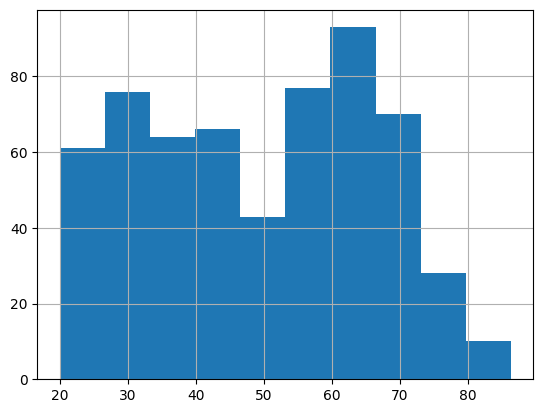

In [31]:
df_main["AGE"].hist()

In [35]:
df_main["SEX_ID (1=m, 2=f)"].value_counts() / len(df_main)

2    0.557823
1    0.442177
Name: SEX_ID (1=m, 2=f), dtype: float64

<AxesSubplot: >

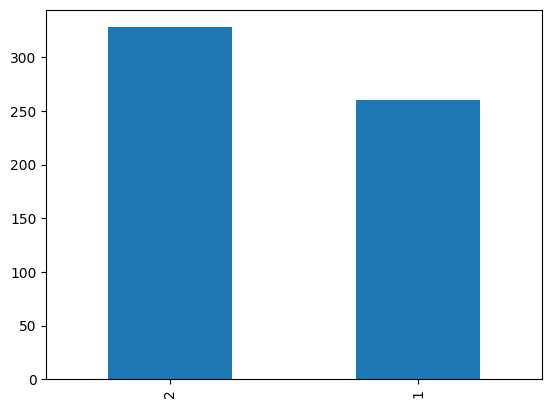

In [34]:
df_main["SEX_ID (1=m, 2=f)"].value_counts().plot(kind="bar")

## Classification

In [18]:
le = LabelEncoder()
le.fit(train_y["SEX_ID (1=m, 2=f)"])
train_y_classification = le.transform(train_y["SEX_ID (1=m, 2=f)"])
val_y_classification = le.transform(valid_y["SEX_ID (1=m, 2=f)"])

In [19]:
model_xgboost = xgb.XGBClassifier()
model_xgboost.fit(train_X, train_y_classification)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred_val = model_xgboost.predict(val_X)
acc_val = accuracy_score(val_y_classification, y_pred_val)
print(f"Validation accuracy: {acc_val}")
balanced_accuracy_val = balanced_accuracy_score(val_y_classification, y_pred_val)
print(f"Validation balanced accuracy: {balanced_accuracy_val}")

Validation accuracy: 0.7711864406779662
Validation balanced accuracy: 0.7697058823529412


In [21]:
model = xgb.XGBRegressor()
train_y = train_y["AGE"].to_numpy()
val_y = valid_y["AGE"].to_numpy()
model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
y_pred_val = model.predict(val_X)
mse_val = mean_squared_error(val_y, y_pred_val)
mae_val = mean_absolute_error(val_y, y_pred_val)
r2_val = r2_score(val_y, y_pred_val)

In [23]:
print(f"Validation MSE: {mse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation R2: {r2_val}")

Validation MSE: 76.8443060804521
Validation MAE: 6.972545011761109
Validation R2: 0.7236824400052084


In [29]:
np.concatenate((y_pred_val.reshape(-1, 1), val_y.reshape(-1, 1)), axis=1)

array([[39.50761032, 41.229295  ],
       [55.06528091, 39.03627652],
       [70.75994873, 72.8843258 ],
       [46.97366333, 43.15674196],
       [60.83927155, 49.04312115],
       [65.9045105 , 67.45516769],
       [61.33227921, 60.46269678],
       [47.87864685, 19.98083504],
       [35.00588608, 26.98425736],
       [30.19041061, 28.61327858],
       [29.63243103, 23.53730322],
       [39.80823898, 52.30116359],
       [54.62612152, 49.40451745],
       [69.03168488, 75.8275154 ],
       [30.11634827, 32.93634497],
       [63.41993332, 63.41957563],
       [37.1133728 , 30.89390828],
       [60.03393936, 55.08829569],
       [53.09794998, 46.59000684],
       [42.17461777, 54.19301848],
       [40.55184174, 28.24366872],
       [40.77590179, 29.25667351],
       [33.80932617, 42.98973306],
       [36.81934357, 29.66461328],
       [35.45912552, 56.67624914],
       [63.83571625, 63.83572895],
       [78.20415497, 78.20396988],
       [30.6860714 , 37.76591376],
       [71.80931091,